# Spam/Ham Detector System

This project is an implementation of a spam detection system using Natural Language Processing (NLP) and a Multinomial Naive Bayes classifier. The goal is to classify SMS messages as either "spam" or "ham" (not spam).

## Project Overview

**Objective:**  
Build a spam detection system that classifies SMS messages as "spam" or "ham" using NLP techniques.

**Key Steps:**  
- Load and explore the dataset.
- Preprocess the text to normalize and clean the data.
- Transform text data into numerical features using CountVectorizer.
- Train a Multinomial Naive Bayes classifier.
- Evaluate the model using metrics such as accuracy, precision, recall, and F1 score.
- Test the model on new data samples.

## Data Loading and Exploration

In [9]:
# Importing necessary libraries
import pandas as pd   
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

# Load the SMS spam dataset
data = pd.read_table("data/SMSSpamCollection.txt", sep="\t", header=None, names=["label", "messages"])

# Display the first few rows of the dataset
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis (EDA)

In [10]:
# Exploring the data  
def explore_data(df):  
    """ Function to explore basic details of the dataframe """
    
    print("\nShape of the dataset:")
    print(df.shape)
    print('======================================================')
    
    print("\nNumber of Null values in the dataset:")
    print(df.isnull().sum().sum())
    print('======================================================')
    
    print("\nDataframe Information:")
    df.info()  # No need to wrap inside print
    print('======================================================')
    
    print("\nStatistical Summary (for numeric columns):")
    print(df.describe(include='all'))  # Include 'all' to summarize both numeric and categorical data
    print('======================================================')

# Call the function on the dataset
explore_data(data)


Shape of the dataset:
(5572, 2)

Number of Null values in the dataset:
0

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

Statistical Summary (for numeric columns):
       label                messages
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


Total No. Of Ham Cases :-  4825
Total No. Of Spam Cases :-  747


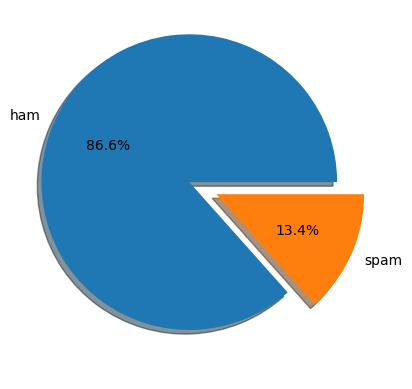

In [11]:
# Visualizing the distribution of "ham" vs "spam" messages
len_ham = len(data["label"][data.label == "ham"])
len_spam = len(data["label"][data.label == "spam"])

# Display counts
print("Total No. Of Ham Cases :- ", len_ham)
print("Total No. Of Spam Cases :- ", len_spam)

# Plotting a pie chart for class distribution
arr = np.array([len_ham , len_spam]) 
labels = ['ham', 'spam'] 
plt.pie(arr, labels=labels, explode = [0.2,0.0], autopct='%1.1f%%', shadow=True) 
plt.show()

## Text Preprocessing

In [12]:
def text_preprocess(x):
    """
    Function for text normalization and cleaning.
    - Converts text to lowercase.
    - Replaces specific patterns and contractions to normalize text.
    """
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k") \
         .replace("′", "'").replace("’", "'") \
         .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not") \
         .replace("n't", " not").replace("what's", "what is").replace("it's", "it is") \
         .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are") \
         .replace("he's", "he is").replace("she's", "she is").replace("'s", " own") \
         .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ") \
         .replace("€", " euro ").replace("'ll", " will")
    return x

# Apply preprocessing to the messages column
data["Preprocessed Text"] = data["messages"].apply(lambda x: text_preprocess(x))
data.head()

# Compare original and preprocessed text for a sample message
print(data['messages'][0])
print('================================================')
print(data['Preprocessed Text'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...


## Feature Engineering and Data Development

In [13]:
# Map labels to numerical values: ham -> 0, spam -> 1
data["label"] = data.label.map({'ham': 0, 'spam': 1})

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Preprocessed Text'], 
                                                    data['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

# Transform text data into numerical features using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

# Fit the training data and transform it into a matrix
training_data = count_vector.fit_transform(X_train)

# Transform the testing data using the same vectorizer (do not fit again)
testing_data = count_vector.transform(X_test)

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


## Model Development and Evaluation

In [14]:
# Train a Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

# Predict on the testing data
predictions = naive_bayes.predict(testing_data)

# Evaluate model performance using various metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9877961234745154
Precision score:  0.9719101123595506
Recall score:  0.9351351351351351
F1 score:  0.953168044077135


## Testing the Model

In [15]:
# Test the model on a new sample text
doc = pd.Series("This is the 2nd time we have tried 2 contact u...")
test = count_vector.transform(doc)
predicted_label = naive_bayes.predict(test)
print("Predicted label for the sample text:", predicted_label)

Predicted label for the sample text: [0]
